In [51]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

def transition_probability(nucleotide_from, nucleotide_to, theta):
    if nucleotide_from == nucleotide_to:
        prob = np.log(1/4 + 3/4 * np.exp(-4/3 * theta))
    else:
        prob = np.log(1/4 * (1 - np.exp(-4/3 * theta)))
    return prob

def sequence_probability(sequence_from, sequence_to, theta):
    log_prob_sum = 0
    for nucleotide_from, nucleotide_to in zip(sequence_from, sequence_to):
        log_prob_sum += transition_probability(nucleotide_from, nucleotide_to, theta)
    return log_prob_sum

# Unrooted tree with 3 tips and sequence length i
def calculate_p_D_given_tau_theta_3(theta, data, i):
    nucleotides = ['T', 'C', 'A', 'G']
    log_total_prob = -np.inf
    for hidden_state in product(nucleotides, repeat=i):
        hidden_state_list = list(hidden_state)
        log_p1 = sequence_probability(hidden_state_list, data[0], theta[0])
        log_p2 = sequence_probability(hidden_state_list, data[1], theta[1])
        log_p3 = sequence_probability(hidden_state_list, data[2], theta[2])
        current_prob = log_p1 + log_p2 + log_p3
        max_prob = max(log_total_prob, current_prob)
        log_total_prob = max_prob + np.log(np.exp(log_total_prob - max_prob) + np.exp(current_prob - max_prob))
    return log_total_prob

# 4 tips and sequence length i
def calculate_p_D_given_tau_theta_4(theta, data, i):
    nucleotides = ['T', 'C', 'A', 'G']
    log_total_prob = -np.inf

    for h1_tuple in product(nucleotides, repeat=i):
        h1 = list(h1_tuple)
        for h2_tuple in product(nucleotides, repeat=i):
            h2 = list(h2_tuple)

            log_p_hidden = sequence_probability(h1, h2, theta[0])
            log_p1 = sequence_probability(h1, data[0], theta[1])
            log_p2 = sequence_probability(h1, data[1], theta[2])
            log_p3 = sequence_probability(h2, data[2], theta[3])
            log_p4 = sequence_probability(h2, data[3], theta[4])
            
            current_prob = log_p_hidden + log_p1 + log_p2 + log_p3 + log_p4
            max_prob = max(log_total_prob, current_prob)
            log_total_prob = max_prob + np.log(np.exp(log_total_prob - max_prob) + np.exp(current_prob - max_prob))
    
    return log_total_prob


In [47]:
data = [['T', 'C', 'A'],
        ['T', 'C', 'A'],
        ['T', 'C', 'C']]
theta = [0.001, 0.001, 0.001]

calculate_p_D_given_tau_theta_3(theta, data, 3)

-8.014699215242693

In [50]:
data = [['T', 'C', 'A'],
        ['T', 'C', 'A'],
        ['T', 'C', 'C'],
        ['T', 'C', 'G']]

theta = [0.001, 0.001, 0.001, 0.001, 0.002]
calculate_p_D_given_tau_theta_4(theta, data, 3)

-14.420026719587618

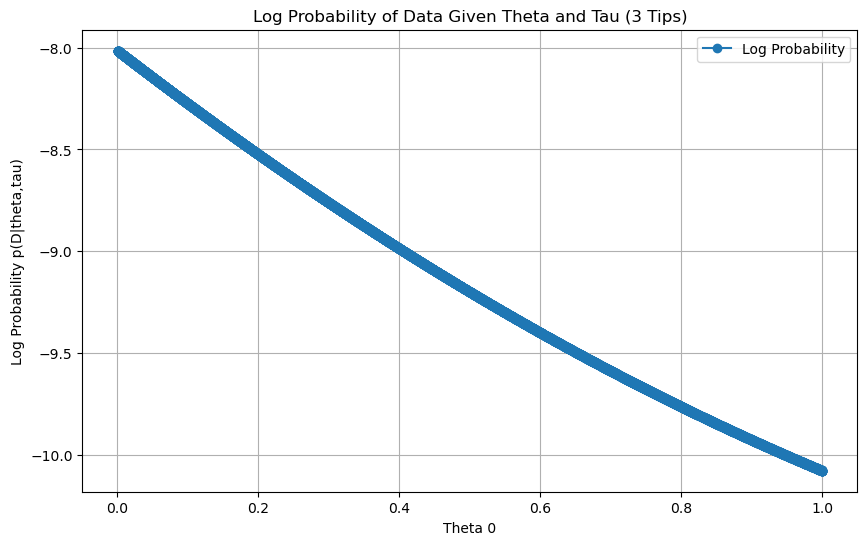

In [52]:
data = [['T', 'C', 'A'],
        ['T', 'C', 'A'],
        ['T', 'C', 'C']]
fixed_theta = [0.001, 0.001, 0.001]

theta_0_values = np.linspace(0.001, 1, 10000)
log_probabilities = []


for theta_0 in theta_0_values:
    theta = [theta_0, fixed_theta[1], fixed_theta[2]]
    log_prob = calculate_p_D_given_tau_theta_3(theta, data, 3)
    log_probabilities.append(log_prob)

plt.figure(figsize=(10, 6))
plt.plot(theta_0_values, log_probabilities, '-o', label='Log Probability')
plt.xlabel('Theta 0')
plt.ylabel('Log Probability p(D|theta,tau)')
plt.title('Log Probability of Data Given Theta and Tau (3 Tips)')
plt.legend()
plt.grid(True)
plt.show()